# Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold

Using TensorFlow backend.


# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/Colab Notebooks/Machine Learning For Data Mining/EEG Data/S1.mat')

print(len(mat))
print(mat)

df=pd.DataFrame.from_dict(mat,orient='index')

print(df.head())

data=df[0].X_3D
print("------------------")
print(data.shape)
print("------------------")

data=data.transpose(1,2,0)


print("------------------")
print(data.shape)
print(data[0])
print("------------------")

label=df[0].categoryLabels

y=np.transpose(label)

y=y-1
print("------------------")
print("y: ",y.shape)
print(y)
print("------------------")

print(len(data))



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
11
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Aug 22 19:12:25 2017', '__version__': '1.0', '__globals__': [], 'sub': array(['S1'], dtype='<U2'), 'Fs': array([[62.5]]), 'N': array([[32]], dtype=uint8), 'T': array([[5188]], dtype=uint16), 'exemplarLabels': array([[40, 64, 29, ..., 59,  3, 12]], dtype=uint8), 'categoryLabels': array([[4, 6, 3, ..., 5, 1, 1]], dtype=uint8), 'X_2D': array([[-0.26424164, -0.47586018, -0.47061757, ...,  0

# Dimensionality Reduction and Normalization

In [0]:
def do_pca(input_data, variance):
  '''
  print("-----------------------------------------------------------------------------------------------------------------------")
  print()
  print("initial shape of data: ",input_data.shape)
  '''
  scaler = StandardScaler()
  input_data = scaler.fit_transform(input_data)

  pca = PCA(n_components = variance)
  principalComponents = pca.fit_transform(input_data)

  '''
  print("Shape of data after PCA: ",principalComponents.shape)

  print("PCA explained varience ratio: ",pca.explained_variance_ratio_)
  plt.plot(pca.explained_variance_ratio_)
  plt.title('PCA Explained Variance Ratio')
  plt.grid(True,which='major',axis='both', linestyle = '-')
  plt.grid(True,which='minor',axis='both', linestyle = '--')
  plt.minorticks_on()
  plt.show()

  print("-----------------------------------------------------------------------------------------------------------------------")
  '''
  return principalComponents

# Binary Classification

Time Stamp:  0





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








For Fold:  1  Accuracy:  0.4855491334647802
For Fold:  2  Accuracy:  0.5028901735826724
For Fold:  3  Accuracy:  0.5260115620717837
For Fold:  4  Accuracy:  0.45664740091114375
For Fold:  5  Accuracy:  0.5433526032232825
For Fold:  6  Accuracy:  0.5028901739272079
For Fold:  7  Accuracy:  0.462427747042882
For Fold:  8  Accuracy:  0.45086705253992465
For Fold:  9  Accuracy:  0.5000000006930773
For Fold:  10  Accuracy:  0.4534883707068687
Time Stamp:  1
For Fold:  1  Accuracy:  0.5144508684301652
For Fold:  2  Accuracy:  0.5086705219538915
For Fold:  3  Accuracy:  0.5202312140451001
For Fold:  4  Accuracy:  0.5086705204034816
For Fold:  5  Accuracy:  0.47976878629943537
For Fold:  6  Accuracy:  0.5317919080312541
For Fold:  7  Accuracy:  0.49132947985492
For Fold:  8  Accuracy:  0.5838150290740018
For Fold:  9  Accuracy:  0.47093023394429406
For Fold:  10  Accuracy: 

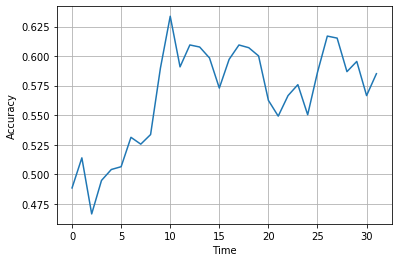

In [0]:
mean_accuracy = []
for i in range(0,32):

  print("Time Stamp: ",i)

  principal_components = do_pca(data[i],0.95)
  bin_data = np.array([])
  bin_labels = np.array([])
  for j in range(0,5188):
    if(y[j]==1):
      bin_labels=np.append(bin_labels,1)
      bin_data=np.append(bin_data,[principal_components[j]])
    elif(y[j]==5):
      bin_labels=np.append(bin_labels,0)
      bin_data=np.append(bin_data,[principal_components[j]])

  bin_data=bin_data.reshape(bin_labels.size,principal_components[0].size)
  bin_labels=np.transpose(bin_labels)
  bin_labels = bin_labels.reshape((1728, 1))

  oh = OneHotEncoder()
  bin_labels = oh.fit_transform(bin_labels)

  #print(bin_data.shape)
  #print(bin_labels.shape)

  accuracy = []

  cv10 = KFold(n_splits=10, random_state=42, shuffle=True)
  k = 0
  for train_index, test_index in cv10.split(bin_data):
    k =k+1
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
      
    X_train, X_test, y_train, y_test = bin_data[train_index], bin_data[test_index], bin_labels[train_index], bin_labels[test_index]
    model = Sequential([
            Dense(32, input_dim = X_train.shape[1], activation = 'relu'),
            Dense(32, activation = 'relu'),
            Dense(2, activation = 'softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.1, shuffle=True, verbose = 0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(test_acc)
    print("For Fold: ",k, " Accuracy: ",accuracy[k-1])
  mean_accuracy.append(np.mean(accuracy))
      

print()
for i in range(0,32):
  print("For time stamp: ",i," Mean Accuracy: ",mean_accuracy[i])

plt.figure()
plt.plot(np.arange(0,32,1), mean_accuracy)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.show()   


# Multi Classification

Time Stamp:  0





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








For Fold:  1  Accuracy:  0.15799614652158667
For Fold:  2  Accuracy:  0.15028901751330823
For Fold:  3  Accuracy:  0.14836223523970513
For Fold:  4  Accuracy:  0.17726396934375138
For Fold:  5  Accuracy:  0.18689788053949905
For Fold:  6  Accuracy:  0.15992292879518977
For Fold:  7  Accuracy:  0.1445086706063651
For Fold:  8  Accuracy:  0.1368015417703544
For Fold:  9  Accuracy:  0.1621621622196956
For Fold:  10  Accuracy:  0.18339768345521684
Time Stamp:  1
For Fold:  1  Accuracy:  0.1579961464354528
For Fold:  2  Accuracy:  0.18689788053949905
For Fold:  3  Accuracy:  0.17919075161735445
For Fold:  4  Accuracy:  0.1522157997869113
For Fold:  5  Accuracy:  0.1541425820605144
For Fold:  6  Accuracy:  0.18111753389095755
For Fold:  7  Accuracy:  0.18111753380482368
For Fold:  8  Accuracy:  0.17533718698401443
For Fold:  9  Accuracy:  0.1621621622196956
For Fold:  10 

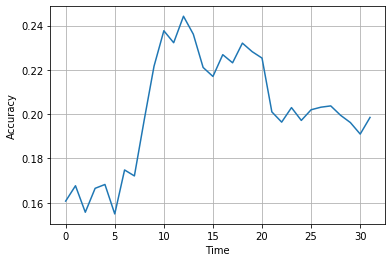

In [4]:
mean_accuracy = []
for i in range(0,32):

  print("Time Stamp: ",i)

  principal_components = do_pca(data[i],0.95)
  #print(principal_components.shape)
  #print(y.shape)

  multi_data = principal_components
  multi_labels = y

  oh = OneHotEncoder()
  multi_labels = oh.fit_transform(multi_labels)

  #print(multi_data.shape)
  #print(multi_labels.shape)

  accuracy = []

  cv10 = KFold(n_splits=10, random_state=42, shuffle=True)
  k = 0
  for train_index, test_index in cv10.split(multi_data):
    k =k+1
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
      
    X_train, X_test, y_train, y_test = multi_data[train_index], multi_data[test_index], multi_labels[train_index], multi_labels[test_index]
    model = Sequential([
            Dense(32, input_dim = X_train.shape[1], activation = 'relu'),
            Dense(32, activation = 'relu'),
            Dense(6, activation = 'softmax')
        ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.1, shuffle=True, verbose = 0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(test_acc)
    print("For Fold: ",k, " Accuracy: ",accuracy[k-1])
  mean_accuracy.append(np.mean(accuracy))
      

print()
for i in range(0,32):
  print("For time stamp: ",i," Mean Accuracy: ",mean_accuracy[i])

plt.figure()
plt.plot(np.arange(0,32,1), mean_accuracy)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.show()